# Tarea 6 - 
### Jose Adrian Castillo Sierra - 1664207
### Luis Enrique López Nerio 1487280
### Gloria Samantha Servin Garcia

Para la realizacion de esta tarea se realiza la clasificacion de vegetales utilizando 3 tecnicas diferentes con el fin de poder comparar las tecnicas y resultados obtenidos

In [23]:
import os
import tensorflow as tf
from tensorflow import keras
import argparse
from imutils import paths
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import glob
from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

Para correr en google colab se guarda el archivo de imagenes en .zip en el drive personal, de da permiso de acceso y de descomprime.

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip "/content/gdrive/MyDrive/Vegetable Images.zip" -d "/content"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/MyDrive/Vegetable Images.zip
replace /content/Vegetable Images/test/Bean/0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## 1 Arquitectura basada en AlexNet

Primero definimos algunos constantes como los tamaños de las imagenes, epochs y directorio base de las imagenes

In [25]:
Hg = 150
Lng = 150
INIT_LR = 0
BS = 16
EPOCHS = 20
#Para correr en local
BASE_DIR = '.\\Vegetable Images'

#para google colab
BASE_DIRG = "/content/gdrive/MyDrive/Vegetable Images"
TrainG = "/content/Vegetable Images/train"
ValG = "/content/Vegetable Images/validation"
TestG = "/content/Vegetable Images/test"



Utilizando ImageDataGenerator de keras cargamos los datos de entrenamiento y de validacion

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen_flow = train_datagen.flow_from_directory(BASE_DIR + '\\train', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')
train_datagen_flow = train_datagen.flow_from_directory(TrainG, target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 15000 images belonging to 15 classes.


In [27]:
valid_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen_flow = valid_datagen.flow_from_directory(BASE_DIR + '\\validation', target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')
valid_datagen_flow = valid_datagen.flow_from_directory(ValG, target_size=(Hg, Lng), batch_size=BS, seed=42, class_mode='categorical')

Found 3000 images belonging to 15 classes.


Definimos una arquitectura de Red Neuronal con base a la de Alexnet

In [28]:
model = Sequential()
model.add(Conv2D(15, (11, 11), input_shape=(Lng, Hg, 3),
        padding='same', kernel_regularizer=l2(INIT_LR)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(15))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['acc', 'AUC'], optimizer='adam')
H = model.fit(train_datagen_flow, validation_data=valid_datagen_flow, steps_per_epoch=len(train_datagen_flow), 
          validation_steps=len(valid_datagen_flow), epochs=EPOCHS, verbose=1)

model.save('model.h5')

Epoch 1/20
938/938 [==============================] - 41s 41ms/step - loss: 1.4442 - acc: 0.5807 - auc: 0.9174 - val_loss: 1.0233 - val_acc: 0.7063 - val_auc: 0.9426
Epoch 2/20
938/938 [==============================] - 37s 39ms/step - loss: 0.8886 - acc: 0.7497 - auc: 0.9673 - val_loss: 0.7610 - val_acc: 0.7783 - val_auc: 0.9748
Epoch 3/20
938/938 [==============================] - 36s 38ms/step - loss: 0.6755 - acc: 0.8110 - auc: 0.9740 - val_loss: 1.3010 - val_acc: 0.5907 - val_auc: 0.9104
Epoch 4/20
938/938 [==============================] - 36s 39ms/step - loss: 0.5592 - acc: 0.8511 - auc: 0.9727 - val_loss: 0.1316 - val_acc: 0.9733 - val_auc: 0.9948
Epoch 5/20
938/938 [==============================] - 37s 39ms/step - loss: 0.4515 - acc: 0.8854 - auc: 0.9701 - val_loss: 0.1950 - val_acc: 0.9513 - val_auc: 0.9835
Epoch 6/20
938/938 [==============================] - 37s 40ms/step - loss: 0.3711 - acc: 0.9108 - auc: 0.9673 - val_loss: 0.3662 - val_acc: 0.8863 - val_auc: 0.9666
Epoc

In [31]:
model.save('model.h5')

Mostramos las curvas de precision y de perdida a lo largo de los epochs.

Algo que se puede notar es como poco a poco el acurracy va en aumento al igual que la perdida se reduce.

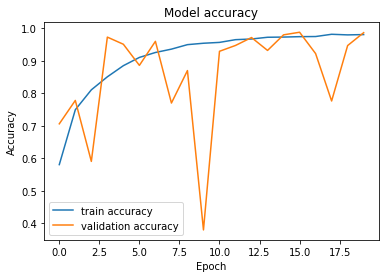

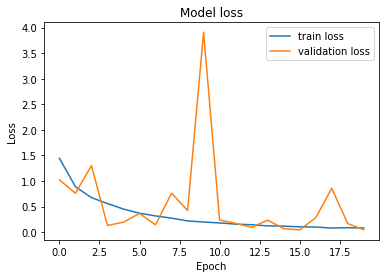

In [32]:
def plot_accuracy(history):
    
    plt.plot(history.history['acc'],label='train accuracy')
    plt.plot(history.history['val_acc'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()
    
def plot_loss(history):
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()
    
plot_accuracy(H)
plot_loss(H)

In [33]:
K.clear_session()
path_to_model='./model.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


En base al modelo generado vamos a compararlo con los datos de validacion. Para esto leeremos las imagenes de validacion y finalmente veremos el resultado final en una matriz de confusion.

In [41]:
"""
validation_datagen = image.ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(
    ValG,#BASE_DIR + '\\validation',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical')
"""

test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(TestG,target_size=(Hg, Lng),batch_size=1,class_mode='categorical',shuffle=False) 

#scores = model.evaluate_generator(validation_generator)
#print("Test Accuracy: {:.3f}".format(scores[1]))
scores = model.evaluate_generator(test_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

Found 3000 images belonging to 15 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  from ipykernel import kernelapp as app


Test Accuracy: 0.987


In [36]:
category={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(150, 150))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 255.   
    
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(category[index]))
    plt.imshow(img_array)
    
def predict_dir(filedir,model):
    cols=3
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    #true=filedir.split('\\')[-1]
    true=filedir.split('/')[-1]
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot, imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(150, 150))
        img_array = image.img_to_array(img_)
        img_processed = np.expand_dims(img_array, axis=0) 
        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
                
        pred=category.get(index)
        if pred==true:
            pos+=1

    acc=pos/total_images
    print("Accuracy for {orignal}: {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images,orignal=true))

In [37]:
validation_folder = TestG#BASE_DIR + '\\validation'
validation_folder

'/content/Vegetable Images/test'

In [39]:
validation_folder = TestG#BASE_DIR + '\\validation'
for i in os.listdir(validation_folder):
    predict_dir(os.path.join(validation_folder,i),model)

Accuracy for Papaya: 0.98 (196/200)
Accuracy for Cauliflower: 1.00 (200/200)
Accuracy for Capsicum: 1.00 (200/200)
Accuracy for Carrot: 0.99 (198/200)
Accuracy for Tomato: 0.98 (197/200)
Accuracy for Cucumber: 1.00 (200/200)
Accuracy for Potato: 1.00 (200/200)
Accuracy for Pumpkin: 0.99 (198/200)
Accuracy for Cabbage: 0.96 (193/200)
Accuracy for Brinjal: 0.97 (195/200)
Accuracy for Broccoli: 0.97 (194/200)
Accuracy for Radish: 1.00 (200/200)
Accuracy for Bottle_Gourd: 1.00 (200/200)
Accuracy for Bean: 0.98 (197/200)
Accuracy for Bitter_Gourd: 0.96 (193/200)


In [45]:
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict_generator(test_generator,steps = nb_samples)
predicted_classes = np.argmax(predict, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

        Bean       1.00      0.98      0.99       200
Bitter_Gourd       1.00      0.96      0.98       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.99      0.97      0.98       200
    Broccoli       0.99      0.97      0.98       200
     Cabbage       0.98      0.96      0.97       200
    Capsicum       0.98      1.00      0.99       200
      Carrot       1.00      0.99      0.99       200
 Cauliflower       0.95      1.00      0.98       200
    Cucumber       0.95      1.00      0.98       200
      Papaya       0.99      0.98      0.98       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.98      0.99      0.99       200
      Radish       1.00      1.00      1.00       200
      Tomato       0.99      0.98      0.99       200

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99   

In [46]:
def labels_confusion_matrix(validation_folder):
    
    folder_path=validation_folder
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        #true=true.split('\\')[-1]
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):

            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(150,150))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="CMRmap"
    cm_plot_labels = [i for i in range(15)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap,xticklabels = class_labels, 
            yticklabels = class_labels) # font size

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [48]:
#y_true,y_pred=labels_confusion_matrix(validation_folder)

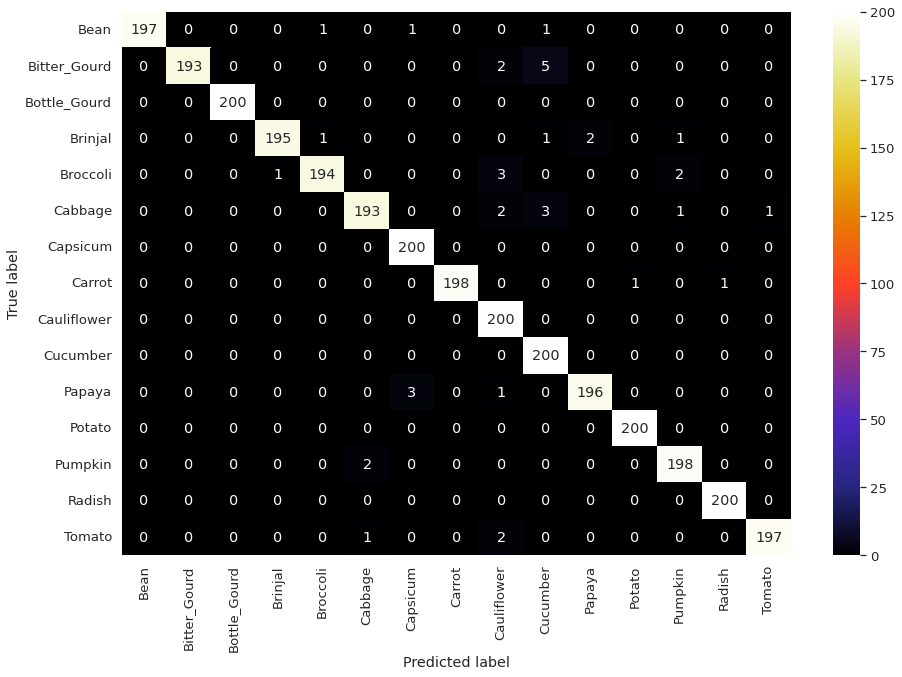

In [49]:
print_confusion_matrix(true_classes,predicted_classes)

In [50]:
#_true = np.array(y_true)
#y_pred = np.array(y_pred)
#np.count_nonzero(y_pred == y_true) / len(y_pred)


true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)
np.count_nonzero(predicted_classes == true_classes) / len(true_classes)

0.987

## Arquitectura especificada por nosotros con modificaciones en las imagenes de entrenamiento

Para la primera modificación se tomara una arquitectura propuesta de manera individual, se tomaran los mismos hiperparametros de batch size, learning rate, etc.
Se realizaran rotación aleatoria de entre 0 y 90 grados, movimiento horizontal y vertical de hasta el 20% del tamaño de la imagen y un zoom aleatorio.

In [61]:

train_datagen2 = ImageDataGenerator(rescale = 1.0/255.0, rotation_range=10,width_shift_range=0.1) # Normalise the data
#entrenamiento_generator = entrenamiento_gen.flow_from_directory(BASE_DIR + '\\train',target_size=(Hg, Lng),batch_size=BS,class_mode='categorical',seed=42)
train_datagen_flow2 = train_datagen2.flow_from_directory(TrainG,target_size=(Hg, Lng),batch_size=BS,class_mode='categorical',seed=42)


Found 15000 images belonging to 15 classes.


Se construye la read Neuronal con una arquitectura propuesta diferente a la de Alexnet.

In [69]:
#Construir Red
model = Sequential() # model object
# Add Layers
model.add(Conv2D(64, (3,3),  activation='relu', input_shape=[Hg, Lng, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))

model.add(Dense(1024, activation='relu'))
model.add(Activation('relu'))

model.add(Dense(15, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 17, 17, 64)      

Se entrena el modelo con un optimizador Adam, se utiliza la función de perdida  CrossEntropy Categorica.

In [70]:

model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['acc', 'AUC'])
H2 = model.fit(train_datagen_flow2, 
                 epochs=EPOCHS, 
                 verbose=1, 
                 validation_data=valid_datagen_flow, 
                  steps_per_epoch=len(train_datagen_flow2), 
                  validation_steps=len(valid_datagen_flow))

Epoch 1/20
938/938 [==============================] - 105s 111ms/step - loss: 1.0904 - acc: 0.6318 - auc: 0.9539 - val_loss: 0.4966 - val_acc: 0.8337 - val_auc: 0.9894
Epoch 2/20
938/938 [==============================] - 104s 110ms/step - loss: 0.3392 - acc: 0.8915 - auc: 0.9938 - val_loss: 0.3120 - val_acc: 0.9050 - val_auc: 0.9930
Epoch 3/20
938/938 [==============================] - 103s 110ms/step - loss: 0.1891 - acc: 0.9413 - auc: 0.9970 - val_loss: 0.3320 - val_acc: 0.9163 - val_auc: 0.9894
Epoch 4/20
938/938 [==============================] - 103s 109ms/step - loss: 0.1225 - acc: 0.9639 - auc: 0.9985 - val_loss: 0.1169 - val_acc: 0.9653 - val_auc: 0.9977
Epoch 5/20
938/938 [==============================] - 104s 111ms/step - loss: 0.0884 - acc: 0.9730 - auc: 0.9990 - val_loss: 0.2847 - val_acc: 0.9207 - val_auc: 0.9913
Epoch 6/20
938/938 [==============================] - 102s 109ms/step - loss: 0.0635 - acc: 0.9801 - auc: 0.9994 - val_loss: 0.1540 - val_acc: 0.9603 - val_auc:

In [71]:
model.save('model2.h5')
K.clear_session()
path_to_model='./model2.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


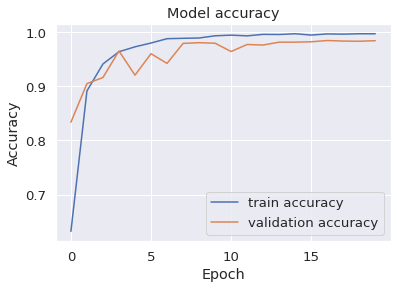

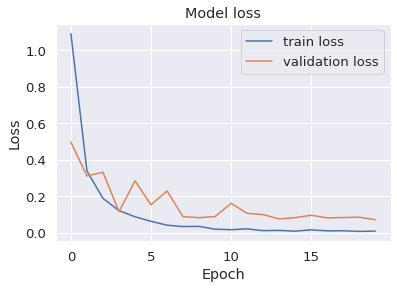

In [72]:
plot_accuracy(H2)
plot_loss(H2)

In [73]:

scores = model.evaluate_generator(test_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test Accuracy: 0.985


#### Test

In [75]:
filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict_generator(test_generator,steps = nb_samples)
predicted_classes = np.argmax(predict, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  


              precision    recall  f1-score   support

        Bean       0.97      0.99      0.98       200
Bitter_Gourd       0.99      0.97      0.98       200
Bottle_Gourd       1.00      0.99      0.99       200
     Brinjal       0.98      0.99      0.99       200
    Broccoli       0.97      0.99      0.98       200
     Cabbage       0.99      0.98      0.99       200
    Capsicum       0.99      0.97      0.98       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.98      0.97      0.97       200
    Cucumber       0.99      1.00      1.00       200
      Papaya       1.00      0.99      1.00       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.96      0.97      0.96       200
      Radish       0.98      0.99      0.99       200
      Tomato       0.97      0.94      0.96       200

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98   

In [77]:
def print_confusion_matrix(real,predicted):
    total_output_labels = 15
    cmap="CMRmap"
    cm_plot_labels = [i for i in range(15)]
    
    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.2) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm,fmt="d", annot=True,cmap=cmap, xticklabels = class_labels, 
            yticklabels = class_labels) # font size
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

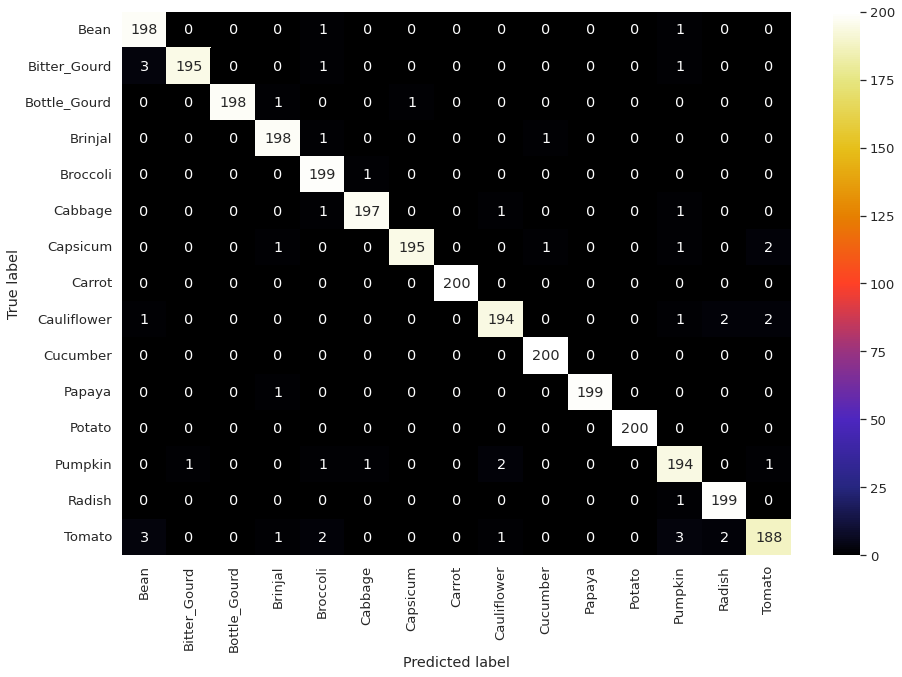

In [78]:
print_confusion_matrix(true_classes,predicted_classes)

## Red Neuronal Cambio de arquitectura e hiperparametros

# Diseñar la red


In [79]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [80]:
model.compile(loss='categorical_crossentropy', metrics=['acc', 'AUC'], optimizer='Adamax')
H3 = model.fit(train_datagen_flow, validation_data=valid_datagen_flow, steps_per_epoch=len(train_datagen_flow), 
          validation_steps=len(valid_datagen_flow), epochs=10, verbose=1)

Epoch 1/10
938/938 [==============================] - 36s 38ms/step - loss: 0.8234 - acc: 0.7278 - auc: 0.9732 - val_loss: 0.4455 - val_acc: 0.8570 - val_auc: 0.9894
Epoch 2/10
938/938 [==============================] - 36s 38ms/step - loss: 0.2209 - acc: 0.9327 - auc: 0.9966 - val_loss: 0.2357 - val_acc: 0.9270 - val_auc: 0.9957
Epoch 3/10
938/938 [==============================] - 35s 38ms/step - loss: 0.0944 - acc: 0.9717 - auc: 0.9992 - val_loss: 0.1985 - val_acc: 0.9397 - val_auc: 0.9959
Epoch 4/10
938/938 [==============================] - 34s 36ms/step - loss: 0.0467 - acc: 0.9865 - auc: 0.9996 - val_loss: 0.1982 - val_acc: 0.9417 - val_auc: 0.9952
Epoch 5/10
938/938 [==============================] - 35s 37ms/step - loss: 0.0236 - acc: 0.9930 - auc: 0.9999 - val_loss: 0.1567 - val_acc: 0.9610 - val_auc: 0.9959
Epoch 6/10
938/938 [==============================] - 34s 37ms/step - loss: 0.0119 - acc: 0.9968 - auc: 0.9999 - val_loss: 0.1541 - val_acc: 0.9663 - val_auc: 0.9951
Epoc

In [81]:

model.save('model3.h5')
K.clear_session()
path_to_model='./model3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


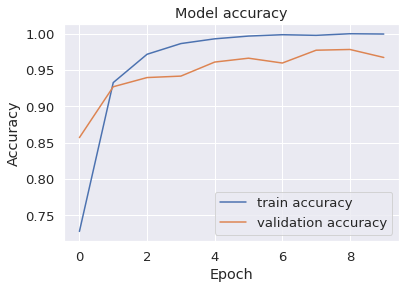

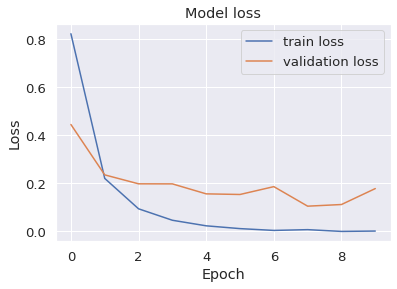

In [82]:

plot_accuracy(H3)
plot_loss(H3)

In [83]:

scores = model.evaluate_generator(test_generator)
print("Test Accuracy: {:.3f}".format(scores[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


Test Accuracy: 0.967


In [86]:

filenames = test_generator.filenames
nb_samples = len(filenames)
predict = model.predict_generator(test_generator,steps = nb_samples)
predicted_classes = np.argmax(predict, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


In [87]:

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

        Bean       0.92      0.99      0.95       200
Bitter_Gourd       0.98      0.97      0.98       200
Bottle_Gourd       0.99      0.98      0.99       200
     Brinjal       0.98      0.96      0.97       200
    Broccoli       0.94      0.96      0.95       200
     Cabbage       0.88      0.97      0.92       200
    Capsicum       0.99      0.98      0.98       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.95      0.97      0.96       200
    Cucumber       0.99      0.94      0.97       200
      Papaya       0.96      0.99      0.98       200
      Potato       1.00      0.99      0.99       200
     Pumpkin       1.00      0.87      0.93       200
      Radish       0.98      0.99      0.99       200
      Tomato       0.96      0.94      0.95       200

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97   

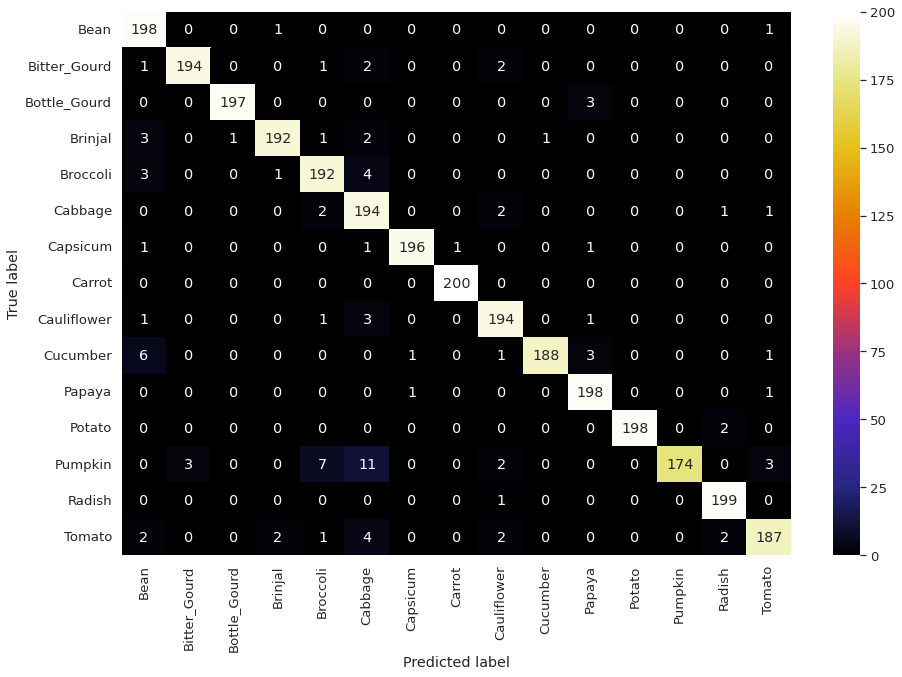

In [88]:

print_confusion_matrix(true_classes,predicted_classes)